In [1]:
# 2.3.2_Plot_posttest_vs_pretest_prob.jpynb
""" Plot Posttest vs Pretest probabilities given
    Sensitivity, Specificity and Test Result """
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load all Helper functions first
def posttest(pretest, TP, TN, result):
    """ Compute posttest probability given
    Parameters: 
        pretest:  pretest probability
        TP: Sensitivty or true-positive rate
        TN: Specificity or true-negative rate
        result: '+ve' or '-ve'
    Return:
        Posttest probability 
    """
    if pretest in [0, 1]:
        return pretest
    if result == '+ve':    
        return pretest*TP/(pretest*TP+(1-pretest)*(1-TN))
    if result == '-ve':
        return pretest*(1-TP)/(pretest*(1-TP)+(1-pretest)*TN)
    return None

# Vectorize above function to make ploting code compact.
posttest_vec = np.vectorize(posttest)

def plot(TP, TN, result='both'):
    """ Plot posttest probabilty vs pretest probability given
    Parameters: 
        TP: Sensitivty or true-positive rate 
        TN: Specificity or true-negative rate
        result: '+ve', '-ve' or 'both'
    """
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    x = np.linspace(0, 1, 1001)
    if result in ['+ve', 'both']:
        ax.plot(x, posttest_vec(x, TP, TN,'+ve' ), 'b', lw=3, 
            label=f"+ve, Sensitivity = {TP}, Specificity = {TN}")
    if result in ['-ve', 'both']:
        ax.plot(x, posttest_vec(x, TP, TN,'-ve' ), 'r--', lw=3, 
            label=f"-ve, Sensitivity = {TP}, Specificity={TN}")
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_xlim(0,1)
    ax.set_xlabel("PreTest Probability")
    ax.set_yticks(np.linspace(0,1,11))
    ax.set_ylim(0,1)
    ax.set_ylabel("PostTest Probability")
    ax.legend(fontsize='large', loc='lower left', bbox_to_anchor=(0,-0.2))
    ax.grid()
    plt.show()

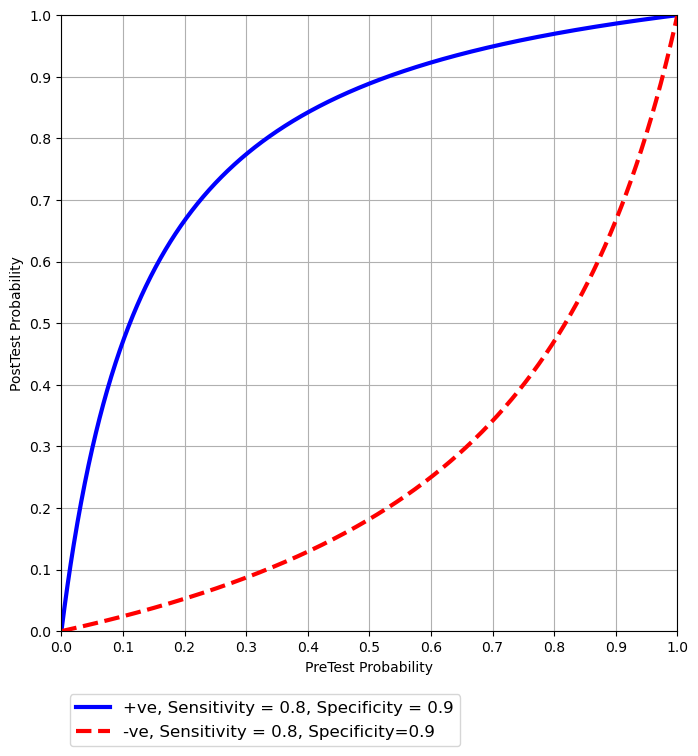

In [3]:
# The main code to run is here
sensitivity = 0.8
specificity = 0.9
result = 'both'  # must be '+ve', '-ve' or 'both'
plot(sensitivity, specificity, result)    